# Dataload and import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random


In [2]:
data = pd.read_csv('../로지스틱/assignment_2.csv')
data['salary']=data['salary'].apply(lambda x : x/10000)
data.head()

,Label,bias,experience,salary
0,1,1,0.7,4.8
1,0,1,1.9,4.8
2,1,1,2.5,6.0
3,0,1,4.2,6.3
4,0,1,6.0,7.6


In [3]:
#data['salary']=data['salary'].apply(lambda x : x/10000)

# Logistic regression 해야하는 data 의 scatter plot

In [4]:
# filter out the applicants that got admitted
MALE = data[data['Label']==1]
FEMALE = data[data['Label'] == 0]


/Users/sungjinpark/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


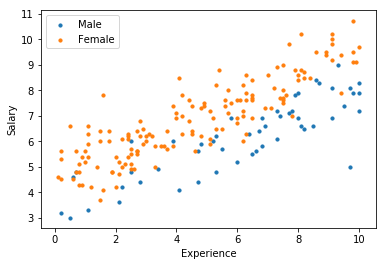

In [5]:
# plots
fig = plt.figure()
plt.scatter(MALE.iloc[:, 2], MALE.iloc[:, 3], s=10, label='Male')
plt.scatter(FEMALE.iloc[:, 2], FEMALE.iloc[:, 3], s=10, label='Female')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.legend()
plt.show()

In [6]:
## 독립변수들
X = data.iloc[:, 1:]

# rescaled_X 
normalized_X = (X[['experience','salary']]-X[['experience','salary']].mean())/X[['experience','salary']].std()
normalized_X['bias'] = X['bias']
cols = normalized_X.columns.tolist()
cols = cols[-1:] + cols[:-1]
normalized_X = normalized_X[cols]
normalized_X = normalized_X.values.tolist()
X= np.array(normalized_X)


#Basic_X
# X = X.values.tolist()
# X = np.array(X)
#X

# 종속변수 Target = T 
T = data['Label']
T = T.values.tolist()
T = np.array(T)
#T

# 회귀계수
beta = np.random.randn(3)
#beta= np.array([1,1,1])
#beta

## 회귀식
## $$ a_n=B^TX = \hat{B}_0 +\hat{B}_1x_1 +\hat{B}_2x_2 ,    \quad\mbox{n=데이터 수}$$




In [8]:
# 내적 -> 회귀계수와 X의 선형결합 
a = X.dot(beta)
a.shape


(200,)

## $$ \mbox 로그오즈 = 회귀식을\  p에\  대해서\  정리 $$
## $$ log(Odds) = \hat{B}_0 +\hat{B}_1x_1 + \hat{B}_2x_2 $$
## $$ \mbox P는 \ 로지스틱 \ 함수 $$
## $$ P = \frac{\mathrm{1} }{\mathrm{1} + e^{-a_n}} = \sigma(x,B) $$ 

In [9]:
# 로지스틱 함수 odds -> log 후 p에 대해 정리

def logistic(a):
    return 1/(1 + np.exp(-a))

P = logistic(a)
P.shape

(200,)

## $$ \mbox 각\  데이터가\  따르는\  확률분포를\   label\  y와\  엮어서\  표현  $$

## $$ P(x_i,y_i | B) = \begin{cases} \sigma(x,B)^{y}, & \mbox{if }y\mbox{ = 1} \\ (1-\sigma(x,B))^{1-y}, & \mbox{if }y\mbox{ = 0} \end{cases} $$

## $$ \mbox 위의 \ 확률분포를 \ 따르는 \   데이터에서 \ 얻은 \ Likelihood  $$

## $$ L = \sigma(x,B)^{y}(1-\sigma(x,B))^{1-y} $$ 

## $$ \mbox log 변환  $$

## $$ L^*=log(L) = ylog(\sigma(x,B)) + (1-y)log(1-\sigma(x,B)) $$ 

## $$ \mbox Convex\  function으로\  만들기\  위한 \ (-) 곱   $$

## $$ \mbox J는\ Loss\ Function  $$

## $$ J= - L^* $$

## $$ \mbox Loss\ function \ = \ Negative\ log \ likelihood\  $$

## $$ \mbox N개의 \ 데이터에\ 대한\ Negative\log\ Likelihood  $$
## $$ J(x_i,y_i|B) = \frac{1}{N}(-y_i\sum_{i=1}^Nlog \sigma(x_i,B)- (1-y_i)\sum_{i=1}^Nlog(1-\sigma(x_i,B))) $$ 


In [19]:
def Negative_log_likelihood(T, P):
    E = 0 # Error
    for i in range(200):  # 200개의 데이터에 대한 Loss
        # y의 레이블이 1이면
 
        E += -1*T[i]*np.log1p(P[i]) + -1*(1-T[i])*np.log1p(1 - P[i])   
    
    return E/200

In [20]:
Negative_log_likelihood(T,P)

-0.3826544201540789

## Loss function 에 대한 Gradient를 구하기 위한 작업 

## $$ \mbox J를 \ B에 \ 대해서\ 편미분  $$

## $$ \mbox J는 \ P에 \ 대한\ 함수이고, \ P는 \ a에 \ 대한 \ 함수이고,\ a는\ B에 \ 대한\ 함수  $$

## $${\partial J\over\partial B} =  -\sum_{i=1}^N {\partial J\over\partial P_i} {\partial P_i\over\partial a_i} {\partial a_i\over\partial B} $$ 

## $${\partial J\over\partial P_i} = \frac{y_i}{P_i}- \frac{1-y_i}{1-P_i} ,\quad {\partial P_i\over\partial a_i} = P_i(1-P_i), \quad {\partial a_i\over\partial B}=X^T $$ 

## $$ \mbox 또한 \ B는 \ B_0,\ B_1,\ B_2이\  있어서\ 각각\ 편미분    $$
## $$ \mbox 간단하게 \  표현하면   $$

## $${\partial J\over\partial B} =  -\sum_{i=1}^N {\partial J\over\partial P_i} {\partial P_i\over\partial a_i} {\partial a_i\over\partial B} = - X^T(y-P) =  X^T(P-y)$$ 

In [21]:
learning_rate = 0.05
loss_hist=[]
for i in range(150000):
    if i % 200 == 0:
        print ('Loss:',Negative_log_likelihood(T, P))
        #print ('beta_hat:',beta)
        loss_hist.append(Negative_log_likelihood(T,P))

    # Beta 추정 
    beta -= (learning_rate * (X.T.dot(P-T))/200)

    # 업데이트 된 beta로 다시 P 계산 
    P = logistic(X.dot(beta))
    P
print ("Final Beta:", beta)

Loss: -0.3826544201540789
Loss: -0.5135621815025029
Loss: -0.5352381649105261
Loss: -0.5470728897449845
Loss: -0.5549654290042112
Loss: -0.5606617646108149
Loss: -0.56497640324679
Loss: -0.5683600239283486
Loss: -0.5710853578874104
Loss: -0.5733276189978758
Loss: -0.5752045952364586
Loss: -0.5767984209719579
Loss: -0.5781681405354367
Loss: -0.5793573104140297
Loss: -0.5803987833346647
Loss: -0.5813178211086506
Loss: -0.5821341794837793
Loss: -0.5828635403303444
Loss: -0.583518517769638
Loss: -0.5841093792317659
Loss: -0.5846445715291086
Loss: -0.5851311108983561
Loss: -0.585574876428563
Loss: -0.58598083374895
Loss: -0.5863532076255455
Loss: -0.5866956166192923
Loss: -0.5870111792203904
Loss: -0.5873025982905661
Loss: -0.5875722288334413
Loss: -0.5878221328252391
Loss: -0.5880541239107105
Loss: -0.5882698040935884
Loss: -0.5884705940532359
Loss: -0.5886577583488717
Loss: -0.5888324264945174
Loss: -0.588995610676938
Loss: -0.5891482207275652
Loss: -0.5892910768351668
Loss: -0.5894249203

Loss: -0.5916758947903757
Loss: -0.5916758948396634
Loss: -0.5916758948865042
Loss: -0.5916758949310187
Loss: -0.5916758949733238
Loss: -0.5916758950135281
Loss: -0.5916758950517371
Loss: -0.5916758950880486
Loss: -0.5916758951225572
Loss: -0.5916758951553528
Loss: -0.59167589518652
Loss: -0.5916758952161405
Loss: -0.5916758952442894
Loss: -0.5916758952710413
Loss: -0.5916758952964646
Loss: -0.5916758953206265
Loss: -0.5916758953435886
Loss: -0.5916758953654105
Loss: -0.5916758953861485
Loss: -0.591675895405857
Loss: -0.5916758954245873
Loss: -0.5916758954423879
Loss: -0.5916758954593048
Loss: -0.5916758954753815
Loss: -0.5916758954906601
Loss: -0.5916758955051806
Loss: -0.5916758955189796
Loss: -0.5916758955320938
Loss: -0.5916758955445566
Loss: -0.591675895556401
Loss: -0.5916758955676569
Loss: -0.5916758955783544
Loss: -0.591675895588521
Loss: -0.5916758955981822
Loss: -0.5916758956073643
Loss: -0.5916758956160902
Loss: -0.5916758956243833
Loss: -0.5916758956322642
Loss: -0.59167589

Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.5916758957831086
Loss: -0.591

array([ 0.29118984, -0.3416726 , -0.17764875])

In [22]:
loss_hist

[-0.3826544201540789,
 -0.5135621815025029,
 -0.5352381649105261,
 -0.5470728897449845,
 -0.5549654290042112,
 -0.5606617646108149,
 -0.56497640324679,
 -0.5683600239283486,
 -0.5710853578874104,
 -0.5733276189978758,
 -0.5752045952364586,
 -0.5767984209719579,
 -0.5781681405354367,
 -0.5793573104140297,
 -0.5803987833346647,
 -0.5813178211086506,
 -0.5821341794837793,
 -0.5828635403303444,
 -0.583518517769638,
 -0.5841093792317659,
 -0.5846445715291086,
 -0.5851311108983561,
 -0.585574876428563,
 -0.58598083374895,
 -0.5863532076255455,
 -0.5866956166192923,
 -0.5870111792203904,
 -0.5873025982905661,
 -0.5875722288334413,
 -0.5878221328252391,
 -0.5880541239107105,
 -0.5882698040935884,
 -0.5884705940532359,
 -0.5886577583488717,
 -0.5888324264945174,
 -0.588995610676938,
 -0.5891482207275652,
 -0.5892910768351668,
 -0.5894249203895129,
 -0.5895504232708937,
 -0.5896681958409102,
 -0.5897787938429574,
 -0.5898827243832827,
 -0.5899804511334792,
 -0.5900723988710398,
 -0.5901589574549

/Users/sungjinpark/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


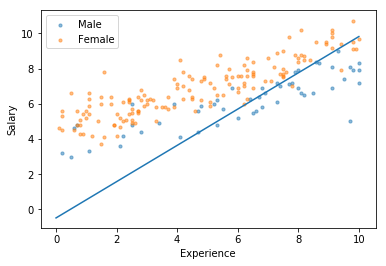

In [23]:
fig = plt.figure()
plt.scatter(MALE.iloc[:, 2], MALE.iloc[:, 3], s=10, label='Male',alpha=0.5)
plt.scatter(FEMALE.iloc[:, 2], FEMALE.iloc[:, 3], s=10, label='Female',alpha=0.5)
#plt.scatter(X[:,1], X[:,2],c=T , s=10, alpha=0.8)
x_axis = np.linspace(0, 10,50)
y_axis = -(beta[0] + x_axis*beta[1]) / beta[2]

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.plot(x_axis, y_axis)
plt.legend()
plt.show()





### 직접 구현을 한 rough한 GD이기 때문에 성능이 안좋을 수 있습니다
### 초기값에 매우 민감하며, 기타 하이퍼 파라미터에 따라 성능이 달라집니다